# Week 1: Some Things You'll Learn About

In this notebook I try to motivate the topic we'll learn about in the course. For the moment there's aliasing, filtering, and convolution.

In [8]:
# load what we need

%matplotlib inline

import numpy as np
import scipy.io.wavfile as wav
from IPython.display import Audio
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [35]:
# load, normalize, and play a wavefile

fs, x = wav.read('herbie.wav')
x = np.double(x)
x /= np.abs(x).max()

Audio(x, rate=fs)

In [5]:
# show an interesting portion of the waveform

_ = plt.stem(x[int(4.52*fs):int(4.52*fs)+100])

Say we want to double the playback speed. A naive idea is to shorten the stream by throwing out every other sample. Indeed, if we play the new stream spitting out the samples at the same sample rate, it should finish in half the time and still go over the whole clip. Let's visualize how this would look like. (Red curve indicates the duration of the original segment above). 

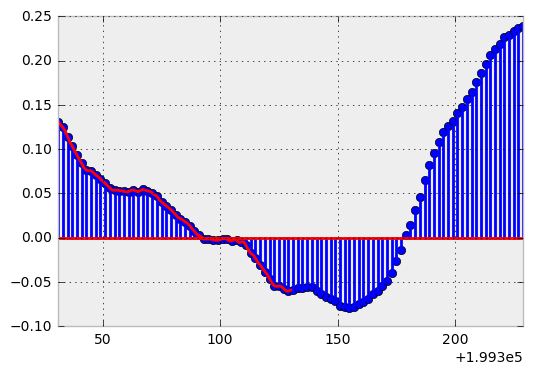

In [20]:
idx1 = np.arange(int(4.52*fs), int(4.52*fs)+200, 2)
idx2 = np.arange(int(4.52*fs), int(4.52*fs)+100)

plt.stem(idx1, x[idx1])
plt.plot(idx2, x[idx2], 'r')
_ = plt.xlim(idx1[0], idx1[-1])

Let's listen to the sped up clip:

In [17]:
Audio(x[::2], rate=fs)

Another option is to halve the sampling rate. This gives us something that sounds very much like the original version.

In [10]:
Audio(x[::2], rate=fs)

Now let's do something funny. Let's add a very high frequency sinusoid to our signal. Actually let's make the frequency so high that we can't hear it. We start by generating the sine wave and listening to it:

In [15]:
freq = 21000 # Hz
n = np.arange(len(x))
tone = np.sin(2*np.pi*freq/fs * n)

Audio(tone, rate=fs)

As expected, we can't hear anything since 21kHz is above human capacity. Now let's add this tone to the original signal and listen to it.

In [16]:
x_tone = x + tone

Audio(x_tone, rate=fs)

Again, this sounds exactly like the original signal---no way to hear that very high pitched note.

OK... now let's try to speed up this thing that sounds just like it used to using the exact same technique as before, that is, playing only every other sample.

In [17]:
# play the downsampled signal with the sine wave added

Audio(x_tone[::2], rate=fs)

Wait! What happened??? Where did this come from? Hmmm... let me better play that at half the rate so that both the speed and the pitch are that of the original clip. I don't want that annoying beep in my music!

In [19]:
Audio(x_tone[::2], rate=fs/2)

Damn! So what happened? I'll tell you what happened my friend... __aliasing__ happened. And you'll understand all about it after weeks 4 and 5 of this course!

_TO DO: add the various videos here._

We can plot the downsampled signal:

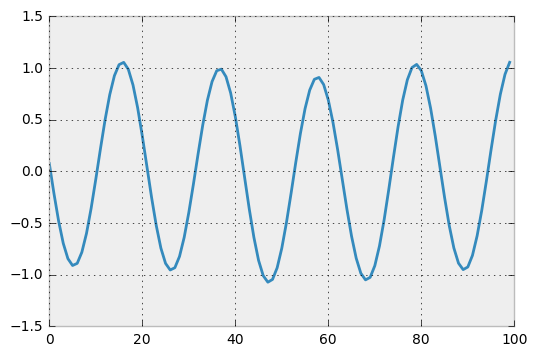

In [147]:
plt.plot(x_tone[fs:fs+200:2])

It's almost a sinusoid! OK... let's see how to remove it. To do that we will have to do some __filtering__. One easy way to remove it would be to simply subtract it. But that will end up being a disaster unless we know exactly the amplitude and the phase of the annoying sine wave. Much more often, we only know the frequency. Curiously, this is sufficient to remove the tone, and to do it we simply have to subtract from each sample of our signal the previous sample multiplied by some complex number. And then do it one more time with a different complex number. Here it comes:

In [148]:
# remove the sinusoid

y = np.zeros(x.shape, dtype=np.complex128)
for k in range(1,len(x)):
    y[k] = x_tone[k] - np.exp(-1j*2*np.pi*freq/fs)*x_tone[k - 1]

z = np.zeros(x.shape, dtype=np.complex128)
for k in range(1,len(x)):
    z[k] = y[k] - np.exp(1j*2*np.pi*freq/fs)*y[k - 1]


Audio(z.real[::2], rate=fs/2)

Sweet, no? The thing just went away.

Some additional demos that will wait for comments below:

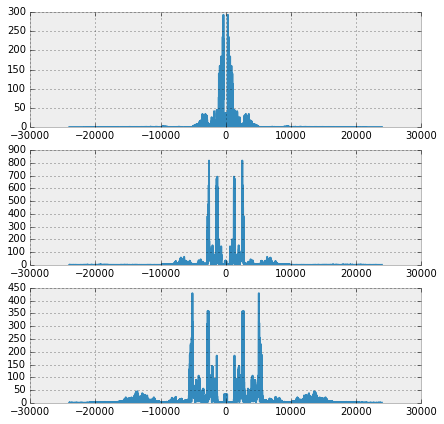

In [99]:
x_fast = x[::2]
x_faster = x[::4]

X = np.fft.fft(x, fs)
X_fast = np.fft.fft(x_fast, fs)
X_faster = np.fft.fft(x_faster, fs)

omega = np.arange(fs) - fs / 2.0

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(311)
plt.plot(omega, np.fft.fftshift(np.abs(X)))

ax = fig.add_subplot(312)
plt.plot(omega, np.fft.fftshift(np.abs(X_fast)))

ax = fig.add_subplot(313)
plt.plot(omega, np.fft.fftshift(np.abs(X_faster)))


In [29]:
# convolution

fs, h = wav.read('h-cathedral.wav')
fs, z = wav.read('can-one-hear-anechoic-normal.wav')

h = np.double(h)
z = np.double(z)

z_conv_h = np.convolve(z, h)

In [30]:
Audio(z, rate=fs)

In [31]:
Audio(h, rate=fs)

In [32]:
Audio(z_conv_h, rate=fs)

In [34]:
xs = np.zeros(x.shape)
xs[::16] = x[::16]
# plt.stem(xs[int(4.52*fs):int(4.52*fs)+40], 'r')


# Audio(xs, rate=fs)
print(x.shape)

(174713,)
